<a href="https://colab.research.google.com/github/cysorianoc/IBM_Data_Science/blob/main/Module_6_practice_Insurance_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)|
|charges| Annual Insurance charges in USD | float|

## Objectives
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models.



# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [ ]:
%pip install seaborn

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

<details>
    <summary>Click here for Solution</summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
```

</details>


### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment.


In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file.

Print the first 10 rows of the dataframe to confirm successful loading.


In [4]:
df=pd.read_csv(path, header=None)
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


<details>
    <summary>Click here for Solution</summary>

```python
df = pd.read_csv(path, header=None)
print(df.head(10))
```

</details>


Add the headers to the dataframe, as mentioned in the project scenario.


In [5]:
# Step 1: define the headers based on the table provided above
headers=['age', 'gender', 'bmi','no_of_children','smoker','region','charges']
# Replace the default headers
df.columns=headers
# Check again the dataframe
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


<details>
    <summary>Click here for Solution</summary>

```python
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
```

</details>


Now, replace the '?' entries with 'NaN' values.


In [6]:
# Step 1: use the method .replace
df.replace('?',np.NaN,inplace=True)
# Step 2: check again the dataframe, see that line 5 changed from ? to NaN in smoker
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


<details>
    <summary>Click here for Solution</summary>

```python
df.replace('?', np.nan, inplace = True)
```

</details>


# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


<details>
    <summary>Click here for Solution</summary>

```python
print(df.info())
```

</details>


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [8]:
# Replace NaN values in 'age' with the average value
avg_age = df['age'].astype('float').mean(axis=0)
df['age'] = df['age'].replace(np.nan, avg_age)

# Replace NaN values in 'smoker' with the most common value
common_smoker = df['smoker'].value_counts().idxmax()
df['smoker'] = df['smoker'].replace(np.nan, common_smoker)

# Convert 'age' and 'smoker' columns to integer type
df[['age', 'smoker']] = df[['age', 'smoker']].astype('int')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


<details>
    <summary>Click here for Solution</summary>

```python
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())
```

</details>


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [10]:
df['charges']=df['charges'].round(2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


<details>
    <summary>Click here for Solution</summary>

```python
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())
```
</details>


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`.


(0.0, 66902.85800000001)

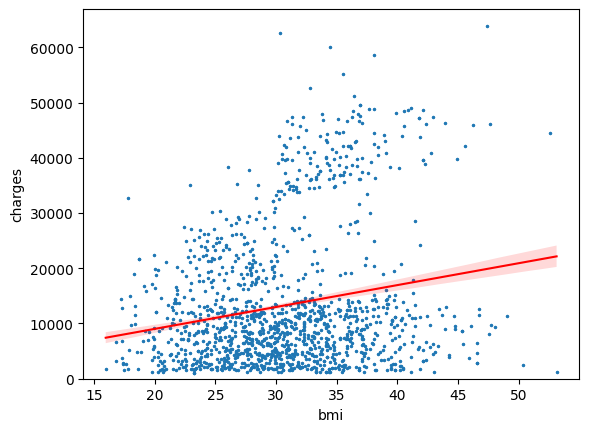

In [11]:
sns.regplot(x='bmi', y='charges',data=df, line_kws={"color": "red", "linewidth": 1.5},scatter_kws={'s':2})
# scatter_kws={'s':2}  -- is optional and controls marker size
# line_kws={"color": "red", "linewidth": 1.5} -- is optional and controls the regression line thickness
# so the plot can be done just with sns.regplot(x='bmi', y='charges',data=df)
plt.ylim(0,)

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)
```
</details>


Implement the box plot for `charges` with respect to `smoker`.


<Axes: xlabel='smoker', ylabel='charges'>

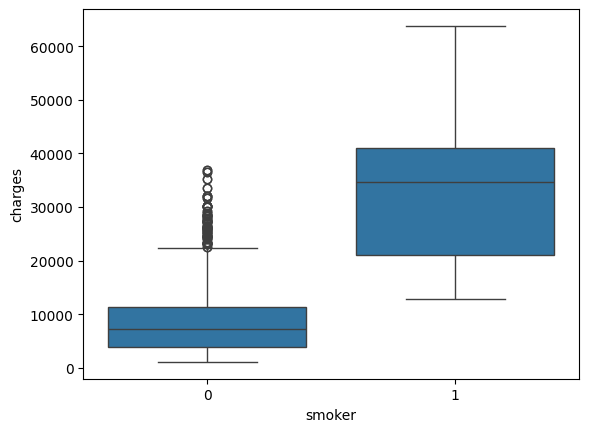

In [12]:
sns.boxplot(x='smoker', y='charges', data=df)

<details>
    <summary>Click here for Solution</summary>

```python
sns.boxplot(x="smoker", y="charges", data=df)
```
</details>


Print the correlation matrix for the dataset.


In [13]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


<details>
    <summary>Click here for Solution</summary>

```python
print(df.corr())
```
</details>


<Axes: >

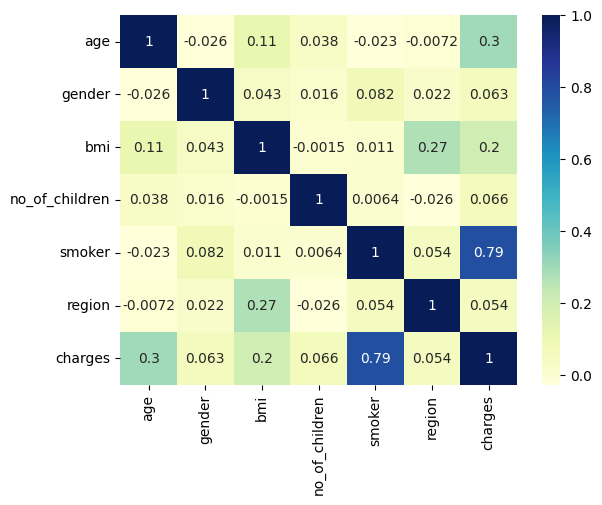

In [16]:
# Alternatively we can build a heatmap containing the correlation between the variables
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [34]:
# Step 1: create a linear regression object
lm_single=LinearRegression()
# Step 2: define the independent variable 'smoker' and the target varianble 'charges'
X=df[['smoker']]
Y=df['charges']
# Step 3: fit the model with .fit(X,Y) method
lm_single.fit(X,Y)
# Print the R-square calculated with .score(X,Y) method
print('The R-square is: ', lm_single.score(X,Y))

## Notice that the calculates value is the same as the shown in the correlation heatmap obtained from the previous step

The R-square is:  0.6221791733924185


<details>
    <summary>Click here for Solution</summary>

```python
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))
```
</details>


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [35]:
# Step 1: create a linear regression object
lm=LinearRegression()
# Step 2: define the independent variable(s) and the target variable 'charges'
Z=df[['age', 'gender', 'bmi','no_of_children','region']]
# Step 3: fit the model with .fit(X,Y) method
lm.fit(Z,Y)
# Print the R-square calculated with .score(X,Y) method
print('The R-square is: ', lm.score(Z,Y))

The R-square is:  0.12426185633470044


<details>
    <summary>Click here for Solution</summary>

```python
# definition of Y and lm remain same as used in last cell.
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))
```
</details>


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [19]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print('The R-square is: ', r2_score(Y,ypipe))

The R-square is:  0.13742866869196957


<details>
    <summary>Click here for Solution</summary>

```python
# Y and Z use the same values as defined in previous cells
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))
```
</details>


In [20]:
# Alternatively, doing something similar as with the linear model, we can obtain R-square
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,Y)
print('The R-square is: ', pipe.score(Z,Y))

The R-square is:  0.13742866869196957


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [21]:
# We will use the multiple attributes variable Z and we will call it x_data - THIS IS OPTIONAL
# We can rename Y, the target variable as Y data just to identify the datasets - THIS IS optional

x_data=Z
y_data=Y

x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 555
number of training samples: 2217


<details>
    <summary>Click here for Solution</summary>

```python
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)
```
</details>


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [53]:
# create a Ridge regression object and define the value for hyperparameter alpha
RidgeModel=Ridge(alpha=0.1)
# fit the ridge model with the training data
RidgeModel.fit(x_train, y_train)
# Evaluate the model, with R-square using the testing data: remember that test data is a better metrics
RidgeModel.score(x_test, y_test)

0.08006811608292919

<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))
```
</details>


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [23]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train) # use fit_transform() on train data
x_test_pr=pr.transform(x_test) # use transform() on test data  - read about data leakage
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.09249788299987072

<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))
```
</details>


## Some notes about the last part of code
```
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.transform(x_test)
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)
```
- `PolynomialFeatures(degree=2)` is used to generate polynomial combinations of the features in `x_train` and `x_test`.

- When `degree=2`, this function generates all polynomial combinations up to the second degree (squared terms and interactions between features).

- For instance, if you have two features, $x_1$ and $x_2$, `PolynomialFeatures` with `degree=2` would create:


$1, x_1, x_2, x_1^2, x_1 \times x_2, x_2^2$

- For the five original features in `Z`, this transformation will generate new features like $\text{age}^2 $, $\text{age} \times \text{bmi}$, and so on. This can help the model capture more complex relationships between the predictors and the target variable.

- A ridge regression model is initialized with ```alpha=0.1```. Ridge regression is a regularized linear regression method that adds a penalty term to the cost function to reduce overfitting, which is particularly useful when using polynomial features as they can lead to a large number of predictors.

- The model is then trained on the transformed training data ```x_train_pr```.



## Understanding ```fit_transform``` and ```transform```

### ```fit_transform```

Purpose: Combines the fit and transform steps into one operation.

Usage: Used on the training data to learn the parameters (e.g., mean and standard deviation) and apply the transformation.
```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
```

### ```transform```

Purpose: Applies a transformation to the data using parameters learned during the fit step.

Usage: Used on the test data (or any new data) to apply the same transformation learned from the training data
```
X_test_scaled = scaler.transform(X_test)
```

# Congratulations! You have completed this project


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>


# How to use the models ?

- Once you've developed and trained your models, you can use them to preduct medical charges for a new patient based on its attributes (age, gender, BMI, etc).


## Example scenario

Let's say a new patient has the following characteristics:

- Age: 45
- Gender: 1 (where 1 might represent male, and 2 represents female based on your dataset coding)
- BMI: 29.5
- Number of Children: 2
- Smoker: 0 (0 = non-smoker, 1 = smoker)
- Region: 3

Using these values, we can predict the charges using each of your trained models.


## 1. Using the Single-Varianle Linear Regression model

In this model, you've used smoker status as the single variable to predict charges. We can only use it if we have just one input feature, the smoker status.

In [44]:
# Set up the input for the model
X_new = [[0]]  # 0 here means non-smoker in this case
X_new_df = pd.DataFrame(X_new, columns=['smoker'])  # Convert the input to a DataFrame
# Predict the charges using the single-variable linear regression model
predicted_charges_single = lm_single.predict(X_new_df)
print("Predicted Charges (Single Variable Model - Smoker Only):", predicted_charges_single[0])

Predicted Charges (Single Variable Model - Smoker Only): 8417.87439311594


Note: ```X_new_df = pd.DataFrame(X_new, columns=['smoker'])  # Convert the input to a DataFrame``` is a conversion of the input into a Dataframe. The model was trained on a Dataframe and  ```X_new = [[0]]``` is an array without names. Then a warning may appear.



## 2. Using Multi-Variable Linear Regression Model
Here, you've trained a model that takes into account several factors like age, gender, BMI, number of children, and region. You can use all these details for a more refined prediction.

In [45]:
# Define the input based on the new patient’s details
Z_new = [[45, 1, 29.5, 2, 3]]  # Age, Gender, BMI, No. of Children, Region
Z_new_df = pd.DataFrame(Z_new, columns=['age', 'gender', 'bmi', 'no_of_children', 'region'])  # Convert the input to a DataFrame
# Predict the charges using the multi-variable linear regression model
predicted_charges_multi = lm.predict(Z_new_df)
print("Predicted Charges (Multi-Variable Linear Regression Model):", predicted_charges_multi[0])


Predicted Charges (Multi-Variable Linear Regression Model): 14088.966676797678


## 3. Using Polynomial Regression (Pipeline)

This model uses polynomial features, which capture more complex relationships between input features and the target variable.

In [46]:
# Predict charges using the polynomial regression pipeline
predicted_charges_poly = pipe.predict(Z_new_df)
print("Predicted Charges (Polynomial Regression Model):", predicted_charges_poly[0])


Predicted Charges (Polynomial Regression Model): 14030.927734375


## 4. Using Ridge Regression

The Ridge regression model is a regularized linear regression, which often generalizes better on unseen data by penalizing large coefficients. It’s particularly useful for reducing overfitting in models with many variables.

In [54]:
# Predict charges using the Ridge regression model
predicted_charges_ridge = RidgeModel.predict(Z_new_df)
print("Predicted Charges (Ridge Regression Model):", predicted_charges_ridge[0])


Predicted Charges (Ridge Regression Model): 14056.821382672815


## 5. Using Ridge Regression with Polynomial Features

This combines the power of polynomial features and Ridge regression to capture complex patterns while keeping the model from overfitting. You’d typically use this only if polynomial regression alone showed improvement.

In [56]:
# Transform the new data point for polynomial features
Z_new_pr = pr.transform(Z_new_df)  # Polynomial transformation of the new patient's data

# Predict using the Ridge regression model on polynomial features
predicted_charges_ridge_poly = RigeModel.predict(Z_new_pr)
print("Predicted Charges (Ridge with Polynomial Features):", predicted_charges_ridge_poly[0])


Predicted Charges (Ridge with Polynomial Features): 13991.10313515054


What is the reason of using ?

```
Z_new_pr = pr.transform(Z_new_df)  # Polynomial transformation of the new patient's data
```

The reason we do ```pr.transform(Z_new_df)``` before predicting with RigeModel.predict is because RigeModel was trained on polynomial features. Here’s a breakdown of why this step:

### Polynomial Features Transformation:

- When we trained the ```RigeModel```, we used a PolynomialFeatures transformation on the input data to create new features (squared, interaction terms, etc.). This transformation expands the original features (like age, gender, etc.) to include additional polynomial terms.

- The ```pr``` object (an instance of PolynomialFeatures) was fitted to the training data to define the exact transformations applied to the features.

### Ensuring Consistent Input for Prediction:

- If we pass the original features directly to ```predict(Z_new_df)```, the ```RigeModel``` won’t know about the polynomial terms and will expect fewer input features than what it was trained on.

- To provide a consistent input format, we use ```pr.transform(Z_new_df)```, which applies the same polynomial transformation to the new input data as was applied during training.

### Pipeline Consistency:

- The transformed data (```Z_new_pr```) has the same structure as the training data that was used for ```RigeModel.fit(...)```, allowing for a valid prediction.

- In summary, calling pr.transform(Z_new_df) ensures that our input to predict has all the polynomial features required by the trained model. Without this step, predict would throw an error due to a mismatch in the number of features.


In [57]:
# this CODE IS A DRAFT
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

# Define the transformers and model
pr = PolynomialFeatures(degree=2)
scaler = StandardScaler()
RidgeModel_scalled = Ridge(alpha=0.1)

# Transform the data
x_train_pr = pr.fit_transform(x_train)   # Polynomial transformation
x_train_scaled = scaler.fit_transform(x_train_pr)  # Scale the transformed training data

# Use only transform on test data to avoid data leakage
x_test_pr = pr.transform(x_test)
x_test_scaled = scaler.transform(x_test_pr)

# Train and evaluate the model
RidgeModel_scalled.fit(x_train_scaled, y_train)
RidgeModel_scalled.score(x_test_scaled, y_test)


0.09248465169967213

In [59]:
# Define the new patient’s data
Z_new = [[45, 1, 29.5, 2, 3]]  # age, gender, bmi, no_of_children, region
Z_new_df = pd.DataFrame(Z_new, columns=['age', 'gender', 'bmi', 'no_of_children', 'region'])  # Convert the input to a DataFrame
# Apply transformations to match the trained model’s input
Z_new_pr = pr.transform(Z_new_df)       # Polynomial features transformation
Z_new_scaled = scaler.transform(Z_new_pr)  # Scale the transformed data

# Predict the charges using the Ridge regression model
predicted_charges_ridge_poly_scaled = RidgeModel_scalled.predict(Z_new_scaled)
print("Predicted Charges (Ridge with Polynomial Features and Scaling):", predicted_charges_ridge_poly_scaled[0])


Predicted Charges (Ridge with Polynomial Features and Scaling): 13991.474448756877
